# 1. 고객 주문 데이터 파악

### 1-1 Dataset
* 온라인 리테일 사이트의 2010/12 ~ 2011/12 까지의 (가상) 데이터 주문 기록 데이터
* 약 500,000건의 데이터

### 1-2. 컬럼 살펴보기
* InvoiceNo : 주문번호
* StockCode : 아이템 아이디
* Description : 상품설명
* Quantity : 상푼 주문 수량
* InvoiceDate: 주문 시간
* UnitPrice : 상품가격
* CustomerID : 고객 아이디
* Country : 고객 거주 지역(국)

In [77]:
import numpy as np
import pandas as pd

In [78]:
retail = pd.read_csv("OnlineRetail.csv")

In [79]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [80]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [81]:
# 각 필드당 null이 몇개 있는지 확인
retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [82]:
# 비회원 제거
# notnull 함수를 이용해서 retail.CustomerID에서 non-NaN value들만 남김
retail = retail[pd.notnull(retail["CustomerID"])]

In [83]:
len(retail)

406829

In [84]:
# 구입 수량이 1 이상, 구입 가격이 1이상인 데이터만 저장
retail = retail[retail['Quantity'] > 0]
retail = retail[retail["UnitPrice"] > 0]
len(retail)

397884

In [85]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      397884 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [86]:
# 고객의 총 지출비용(CkeckoutPrice) = 수량 * 가격
retail["CheckoutPrice"] = retail["UnitPrice"] * retail["Quantity"]
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [87]:
retail.to_csv("OnlineRetailClean.csv")

In [88]:
retail = pd.read_csv("OnlineRetailClean.csv")

In [89]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     397884 non-null  int64  
 1   InvoiceNo      397884 non-null  int64  
 2   StockCode      397884 non-null  object 
 3   Description    397884 non-null  object 
 4   Quantity       397884 non-null  int64  
 5   InvoiceDate    397884 non-null  object 
 6   UnitPrice      397884 non-null  float64
 7   CustomerID     397884 non-null  float64
 8   Country        397884 non-null  object 
 9   CheckoutPrice  397884 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 30.4+ MB


In [90]:
# 메모리 저장 공간을 효율적으로 하기 위해,
# data file을 불러올때 datatype을 지정해서 불러오는 방법
# 왜?? 2억을 넣었는데 int2가 dtype이라면 메모리 공간이 모자라서 숫자가 짤림
# 숫자가 두자리 수인데 int64일 경우, 숫자를 저장할때마다 64바이트를 쓰게 됨 > 메모리 낭비
dtypes = {"UnitPrice":np.float32, "CustomerID":np.int32, "Quantity":np.int32}
retail = pd.read_csv("OnlineRetailClean.csv", dtype=dtypes)
retail.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34


In [91]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     397884 non-null  int64  
 1   InvoiceNo      397884 non-null  int64  
 2   StockCode      397884 non-null  object 
 3   Description    397884 non-null  object 
 4   Quantity       397884 non-null  int32  
 5   InvoiceDate    397884 non-null  object 
 6   UnitPrice      397884 non-null  float32
 7   CustomerID     397884 non-null  int32  
 8   Country        397884 non-null  object 
 9   CheckoutPrice  397884 non-null  float64
dtypes: float32(1), float64(1), int32(2), int64(2), object(4)
memory usage: 25.8+ MB


### 1-3. 날짜 타입 데이터 변환

In [92]:
# infer_datetime_format = True : 날짜 시간 포멧을 자동으로 추정해서 return
retail["InvoiceDate"] = pd.to_datetime(retail["InvoiceDate"], infer_datetime_format=True)

In [93]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Unnamed: 0     397884 non-null  int64         
 1   InvoiceNo      397884 non-null  int64         
 2   StockCode      397884 non-null  object        
 3   Description    397884 non-null  object        
 4   Quantity       397884 non-null  int32         
 5   InvoiceDate    397884 non-null  datetime64[ns]
 6   UnitPrice      397884 non-null  float32       
 7   CustomerID     397884 non-null  int32         
 8   Country        397884 non-null  object        
 9   CheckoutPrice  397884 non-null  float64       
dtypes: datetime64[ns](1), float32(1), float64(1), int32(2), int64(2), object(3)
memory usage: 25.8+ MB


In [94]:
retail.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


# 1-4. 매출구하기

In [95]:
# 전체 매출
total_revenue = retail["CheckoutPrice"].sum()
total_revenue

8911407.904

In [96]:
# rev_by_countries = retail.groupby("Country")["CheckoutPrice"].sum().sort_values()
rev_by_countries = retail.groupby("Country").sum()["CheckoutPrice"].sort_values()
rev_by_countries

<ipython-input-96-5475b374bf49>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rev_by_countries = retail.groupby("Country").sum()["CheckoutPrice"].sort_values()


Country
Saudi Arabia                145.920
Bahrain                     548.400
Czech Republic              826.740
RSA                        1002.310
Brazil                     1143.600
European Community         1300.250
Lithuania                  1661.060
Lebanon                    1693.880
United Arab Emirates       1902.280
Unspecified                2667.070
Malta                      2725.590
USA                        3580.390
Canada                     3666.380
Iceland                    4310.000
Greece                     4760.520
Israel                     7221.690
Poland                     7334.650
Austria                   10198.680
Cyprus                    13590.380
Italy                     17483.240
Denmark                   18955.340
Channel Islands           20450.440
Singapore                 21279.290
Finland                   22546.080
Portugal                  33439.890
Norway                    36165.440
Japan                     37416.370
Sweden              

In [97]:
retail = retail.drop("Unnamed: 0", axis=1)
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


[Text(0, 0, 'Saudi Arabia'),
 Text(1, 0, 'Bahrain'),
 Text(2, 0, 'Czech Republic'),
 Text(3, 0, 'RSA'),
 Text(4, 0, 'Brazil'),
 Text(5, 0, 'European Community'),
 Text(6, 0, 'Lithuania'),
 Text(7, 0, 'Lebanon'),
 Text(8, 0, 'United Arab Emirates'),
 Text(9, 0, 'Unspecified'),
 Text(10, 0, 'Malta'),
 Text(11, 0, 'USA'),
 Text(12, 0, 'Canada'),
 Text(13, 0, 'Iceland'),
 Text(14, 0, 'Greece'),
 Text(15, 0, 'Israel'),
 Text(16, 0, 'Poland'),
 Text(17, 0, 'Austria'),
 Text(18, 0, 'Cyprus'),
 Text(19, 0, 'Italy'),
 Text(20, 0, 'Denmark'),
 Text(21, 0, 'Channel Islands'),
 Text(22, 0, 'Singapore'),
 Text(23, 0, 'Finland'),
 Text(24, 0, 'Portugal'),
 Text(25, 0, 'Norway'),
 Text(26, 0, 'Japan'),
 Text(27, 0, 'Sweden'),
 Text(28, 0, 'Belgium'),
 Text(29, 0, 'Switzerland'),
 Text(30, 0, 'Spain'),
 Text(31, 0, 'Australia'),
 Text(32, 0, 'France'),
 Text(33, 0, 'Germany'),
 Text(34, 0, 'EIRE'),
 Text(35, 0, 'Netherlands'),
 Text(36, 0, 'United Kingdom')]

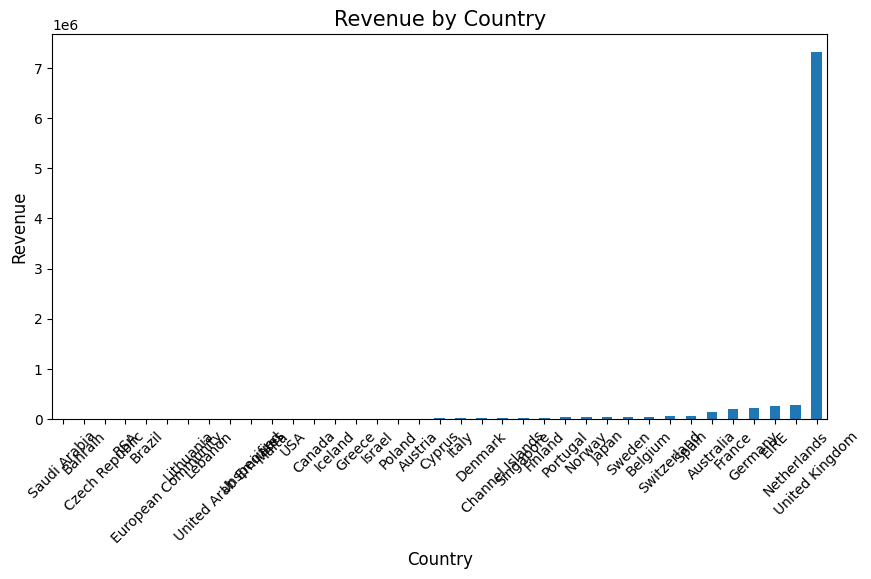

In [98]:
plot = rev_by_countries.plot(kind='bar', figsize=(10,5))
plot.set_xlabel('Country', fontsize = 12)
plot.set_ylabel("Revenue", fontsize=12)
plot.set_title("Revenue by Country", fontsize=15)
plot.set_xticklabels(labels=rev_by_countries.index, rotation=45)

In [99]:
rev_by_countries / total_revenue

Country
Saudi Arabia            0.000016
Bahrain                 0.000062
Czech Republic          0.000093
RSA                     0.000112
Brazil                  0.000128
European Community      0.000146
Lithuania               0.000186
Lebanon                 0.000190
United Arab Emirates    0.000213
Unspecified             0.000299
Malta                   0.000306
USA                     0.000402
Canada                  0.000411
Iceland                 0.000484
Greece                  0.000534
Israel                  0.000810
Poland                  0.000823
Austria                 0.001144
Cyprus                  0.001525
Italy                   0.001962
Denmark                 0.002127
Channel Islands         0.002295
Singapore               0.002388
Finland                 0.002530
Portugal                0.003752
Norway                  0.004058
Japan                   0.004199
Sweden                  0.004307
Belgium                 0.004623
Switzerland             0.006334
Sp

### 1-5 월별 매출 구하기

In [100]:
# retail["year"] = retail["InvoiceDate"].dt.year

In [101]:
retail["month"] = retail["InvoiceDate"].dt.month.apply(lambda x:("0" + str(x)) if x < 10 else x)

In [102]:
retail["YearMonth"] = retail["InvoiceDate"].dt.year.astype(str) + retail["month"].astype(str)

In [103]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice,month,YearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,12,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,201012


In [104]:
rev_by_month = retail.groupby("YearMonth").sum()["CheckoutPrice"]
rev_by_month

<ipython-input-104-04a39b03c058>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rev_by_month = retail.groupby("YearMonth").sum()["CheckoutPrice"]


YearMonth
201012     572713.890
201101     569445.040
201102     447137.350
201103     595500.760
201104     469200.361
201105     678594.560
201106     661213.690
201107     600091.011
201108     645343.900
201109     952838.382
201110    1039318.790
201111    1161817.380
201112     518192.790
Name: CheckoutPrice, dtype: float64

In [105]:
def plot_bar(df, xlabel, ylabel, title, figsize=(10,10), rotation=45):
  plot = df.plot(kind="bar", figsize=figsize)
  plot.set_xlabel(xlabel, fontsize=12)
  plot.set_ylabel(ylabel, fontsize=12)
  plot.set_title(title, fontsize=15)
  plot.set_xticklabels(labels=df.index, rotation=rotation)

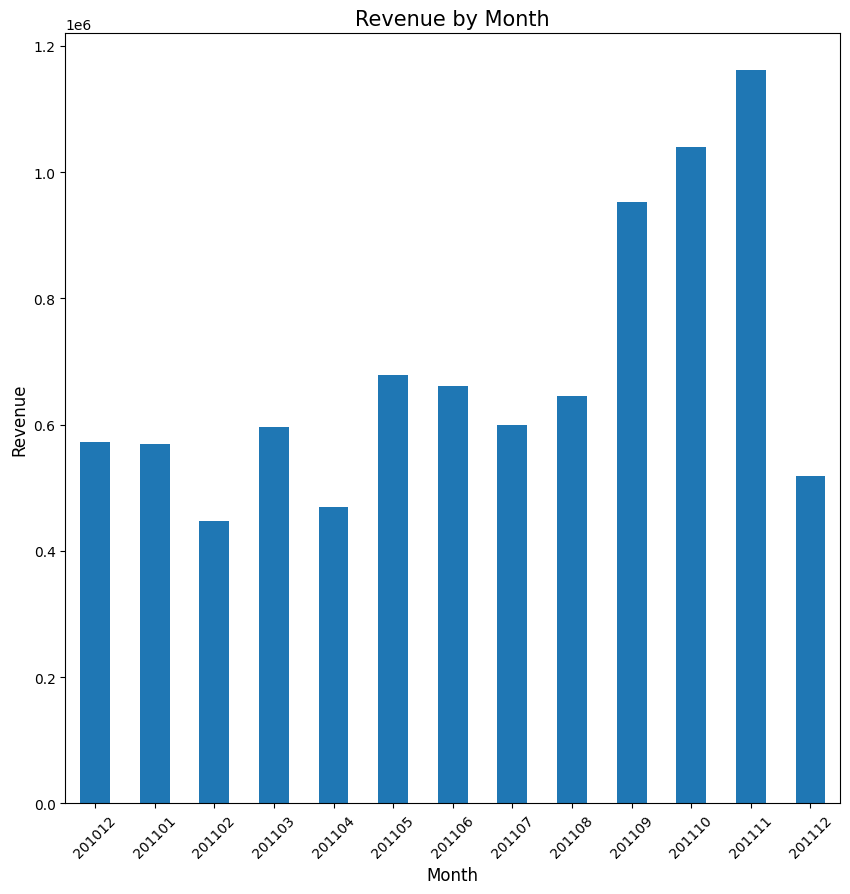

In [106]:
plot_bar(rev_by_month, "Month", "Revenue", "Revenue by Month")

### 1-6 요일별 매출 구하기

In [107]:
# set_index() : key에 들어가는 column이 인덱스가 됨
rev_by_dow = retail.set_index("InvoiceDate").groupby(lambda date:date.dayofweek).sum()["CheckoutPrice"]
rev_by_dow.index = np.array(["Mon", "Tue", "Wed", "Thur", "Fri", "Sat", "Sun"])[rev_by_dow.index]
rev_by_dow

<ipython-input-107-70e61883fe85>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rev_by_dow = retail.set_index("InvoiceDate").groupby(lambda date:date.dayofweek).sum()["CheckoutPrice"]


Mon     1367146.411
Tue     1700634.631
Wed     1588336.170
Thur    1976859.070
Fri     1485917.401
Sun      792514.221
Name: CheckoutPrice, dtype: float64

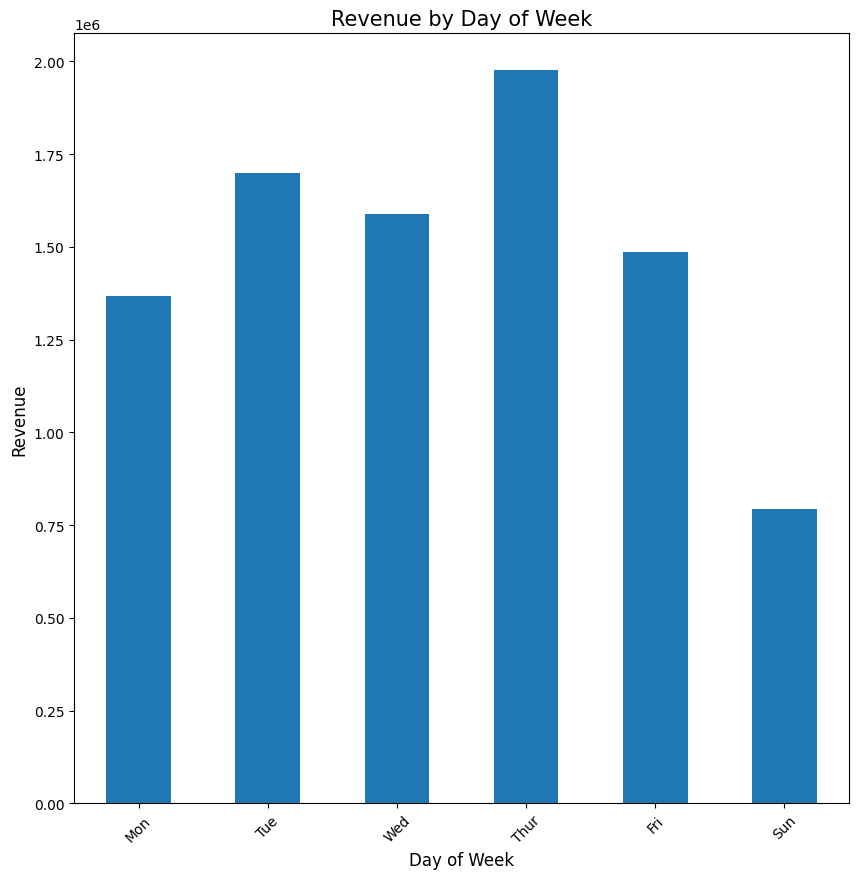

In [108]:
plot_bar(rev_by_dow, "Day of Week", "Revenue", "Revenue by Day of Week")

### 1-7 시간대별 매출 구하기

In [109]:
rev_by_hour = retail.set_index("InvoiceDate").groupby(lambda hour:hour.hour).sum()["CheckoutPrice"]
rev_by_hour

<ipython-input-109-b652d837ec03>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rev_by_hour = retail.set_index("InvoiceDate").groupby(lambda hour:hour.hour).sum()["CheckoutPrice"]


InvoiceDate
6           4.250
7       31059.210
8      282115.630
9      842605.171
10    1261192.571
11    1104558.750
12    1378571.480
13    1173264.750
14     995629.371
15     966191.750
16     468885.800
17     234413.521
18     104954.430
19      49028.460
20      18932.760
Name: CheckoutPrice, dtype: float64

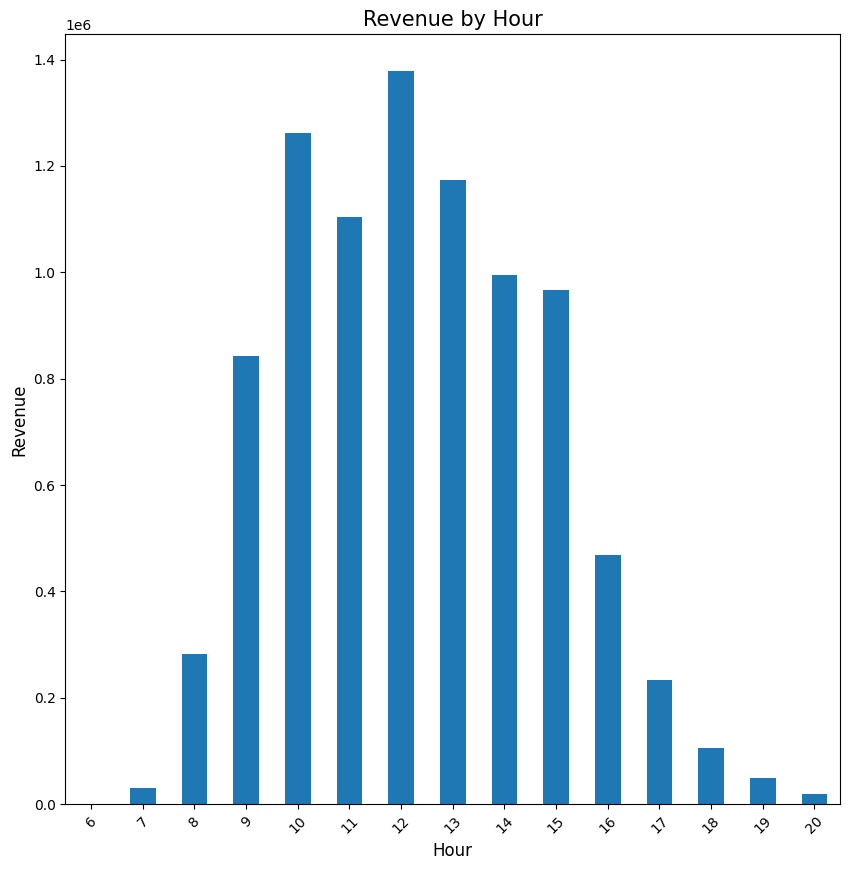

In [110]:
plot_bar(rev_by_hour, "Hour", "Revenue", "Revenue by Hour")

# 2 매출 데이터로부터 Insight

* 전체 매출의 약 82%가 UK에서 발생
* 11년도 가장 많은 매출이 발생한 달은 11월
* 매출은 꾸준히 급성장하고 있음 (12월 데이터는 9일까지 포함, 그러므로 31일까지 매출이 더 늘것으로 예상)
* 일주일 중 목요일까지는 성장세, 이후로는 하락 (토요일에는 영업을 하지 않음)
* 새벽 6시에 주문이 시작, 12시까지는 성장세, 오후 3시 이후는 급락

# 3. 제품별 metrics

In [111]:
# TOP 10 판매 제품 (Quantity)
# top_stock_quan = retail.groupby("StockCode").sum()["Quantity"].nlargest(n=10)
top_stock_quan = retail.groupby("StockCode").sum()["Quantity"].sort_values(ascending=False)[:10]
top_stock_quan
# 만약 Quantity에서 duplicate이 있다면 df.nlargest(n=10, columns=["Quantity", "second choice"])

<ipython-input-111-2ec9478d1a6b>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_stock_quan = retail.groupby("StockCode").sum()["Quantity"].sort_values(ascending=False)[:10]


StockCode
23843     80995
23166     77916
84077     54415
22197     49183
85099B    46181
85123A    36782
84879     35362
21212     33693
23084     27202
22492     26076
Name: Quantity, dtype: int32

In [112]:
# TOP 10 매출 제품 (ChekcoutPrice)
top_stock_price = retail.groupby("StockCode").sum()["Quantity"].nlargest(n=10)
top_stock_price

<ipython-input-112-566f10c75f3d>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_stock_price = retail.groupby("StockCode").sum()["Quantity"].nlargest(n=10)


StockCode
23843     80995
23166     77916
84077     54415
22197     49183
85099B    46181
85123A    36782
84879     35362
21212     33693
23084     27202
22492     26076
Name: Quantity, dtype: int32

# 4. 우수고객

In [113]:
# 구매 횟수 기준 (Quantity)
top_cus_quan = retail.groupby("CustomerID").count()["Quantity"].nlargest(n=10)
top_cus_quan

CustomerID
17841    7847
14911    5675
14096    5111
12748    4595
14606    2700
15311    2379
14646    2076
13089    1818
13263    1677
14298    1637
Name: Quantity, dtype: int64

In [114]:
# 지불 금액 기준 (CheckoutPrice)
top_cus_price = retail.groupby("CustomerID").sum()["CheckoutPrice"].nlargest(n=10)
top_cus_price

<ipython-input-114-098f1c18f60c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_cus_price = retail.groupby("CustomerID").sum()["CheckoutPrice"].nlargest(n=10)


CustomerID
14646    280206.02
18102    259657.30
17450    194550.79
16446    168472.50
14911    143825.06
12415    124914.53
14156    117379.63
17511     91062.38
16029     81024.84
12346     77183.60
Name: CheckoutPrice, dtype: float64

# 4. 사용자 기준으로 최초 구매한날로부터 지난 월 계산하기

In [115]:
from datetime import datetime

In [116]:
def get_month_as_datetime(date):
     return datetime(date.year, date.month, 1)

In [117]:
retail["Month"] = retail["InvoiceDate"].apply(get_month_as_datetime)
# retail["Month"] = retail["InvoiceDate"].apply(lambda date:datetime(date.year, date.month, 1))
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice,month,YearMonth,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12,201012,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,201012,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,12,201012,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,201012,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,201012,2010-12-01


In [118]:
month_group = retail.groupby("CustomerID")["Month"]
#transform() : 데이터프레임에 그룹단위 통계를 집계
retail["MonthStarted"] = month_group.transform(np.min)
retail.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice,month,YearMonth,Month,MonthStarted
397879,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,12,201112,2011-12-01,2011-08-01
397880,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,12,201112,2011-12-01,2011-08-01
397881,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,12,201112,2011-12-01,2011-08-01
397882,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,12,201112,2011-12-01,2011-08-01
397883,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85,12,201112,2011-12-01,2011-08-01


In [119]:
# 각 구매가 최초 구매로부터 얼마의 월이 지났는지 연산
retail["MonthPassed"] = (retail["Month"].dt.year - retail["MonthStarted"].dt.year) * 12 + (retail["Month"].dt.month - retail["MonthStarted"].dt.month)
retail.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice,month,YearMonth,Month,MonthStarted,MonthPassed
397879,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,12,201112,2011-12-01,2011-08-01,4
397880,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,12,201112,2011-12-01,2011-08-01,4
397881,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,12,201112,2011-12-01,2011-08-01,4
397882,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,12,201112,2011-12-01,2011-08-01,4
397883,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85,12,201112,2011-12-01,2011-08-01,4


In [120]:
# 혼자 풀어보기 only by date; not month
retail["OrderDate"] = retail["InvoiceDate"].apply(lambda x:datetime(x.year, x.month, x.day))
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice,month,YearMonth,Month,MonthStarted,MonthPassed,OrderDate
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12,201012,2010-12-01,2010-12-01,0,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,201012,2010-12-01,2010-12-01,0,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,12,201012,2010-12-01,2010-12-01,0,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,201012,2010-12-01,2010-12-01,0,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,201012,2010-12-01,2010-12-01,0,2010-12-01


In [121]:
minMonth = retail.groupby("CustomerID").min()["OrderDate"].to_frame()
maxMonth= retail.groupby("CustomerID").max()["OrderDate"].to_frame()

<ipython-input-121-6720c5f758d4>:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  minMonth = retail.groupby("CustomerID").min()["OrderDate"].to_frame()
<ipython-input-121-6720c5f758d4>:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  maxMonth= retail.groupby("CustomerID").max()["OrderDate"].to_frame()


In [122]:
month = pd.merge(minMonth, maxMonth, on="CustomerID")
month.columns = ["StartDate", "RecentDate"]
month.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4338 entries, 12346 to 18287
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   StartDate   4338 non-null   datetime64[ns]
 1   RecentDate  4338 non-null   datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 101.7 KB


In [123]:
month["diff_days"] = month.RecentDate - month.StartDate
month.head()

,StartDate,RecentDate,diff_days
CustomerID,,,
12346,2011-01-18,2011-01-18,0 days
12347,2010-12-07,2011-12-07,365 days
12348,2010-12-16,2011-09-25,283 days
12349,2011-11-21,2011-11-21,0 days
12350,2011-02-02,2011-02-02,0 days


In [133]:
month['month_diff'] = ((month.RecentDate - month.StartDate)/np.timedelta64(1, 'M')).round(1)
month["year_diff"] = ((month.RecentDate - month.StartDate)/np.timedelta64(1, 'Y')).round(1)
month

,StartDate,RecentDate,diff_days,month_diff,year_diff
CustomerID,,,,,
12346,2011-01-18,2011-01-18,0 days,0.0,0.0
12347,2010-12-07,2011-12-07,365 days,12.0,1.0
12348,2010-12-16,2011-09-25,283 days,9.3,0.8
12349,2011-11-21,2011-11-21,0 days,0.0,0.0
12350,2011-02-02,2011-02-02,0 days,0.0,0.0
...,...,...,...,...,...
18280,2011-03-07,2011-03-07,0 days,0.0,0.0
18281,2011-06-12,2011-06-12,0 days,0.0,0.0
18282,2011-08-05,2011-12-02,119 days,3.9,0.3
